이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left">
    <tr>
        <td>
            <a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/main/chapter05_fundamentals-of-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
        </td>
    </tr>
</table>

# 머신 러닝의 기본 요소
- 데이터
 - 열심히 봐야한다.
 - 탐색적 데이터 분석(EDA)
 - 통계량(평균, 표준편차, 상관계수, 왜도, 최빈값)
 - 이상치 탐색, 결측치 탐색, 중복 여부
 - 시각화(히스토그램, 박스플랏, 산점도, 바챠트, 라인챠트, 페어플랏, 조인트플랏)
- 데이터 정재
 - 결측치/이상치 제거/대체
 - 범주형으로 숫자로(one-hot)
 - 범주형의 그룹화
 - 연속형 변수에 대한 구간화
 - 상관관계가 있는 변수들 간의 교호작용을 만들어(x1*x2, x1/x2)
 - 중복 데이터의 제거
 - 분리가능한 정보를 스플릿
- 알고리즘
 - 회귀 알고리즘
 - 분류 알고리즘
- 옵티마이저 : 학습 파라미터 업데이트
- 손실 함수
- 운영: 성능 모니터링 및 리뉴얼
- 연구: 신기술 탐색, 벤치마킹 등

## 일반화: 머신 러닝의 목표

### 과소적합과 과대적합
1. 과소적합: underfit
 - 데이터의 부족
 - 피처의 부족 : y = X.w + b + e | $R^2 : 결정계수$
 - 학습 량의 부족. epoch. 너무 큰 학습률
 - 부적절한 알고리즘
    - 표형식의 데이터: Dense와 같은 연산이 적절. Tree 기반의 wide learning 모델(lightGBM)
    - 이미지와 같은 공간적 연속성을 갖는 데이터. Dense는 부적절. CNN 연산을 사용
    - 시계열 데이터는 연속된 단방향 시퀀스 상에서 연속성을 갖는다. RNN 계열의 연산
    - 자연어 데이터는 연속된 양방향 시퀀스 상에서 연속성을 갖는다. biRNN 계열의 연산
    - 최근에서는 모든 형식의 데이터에 대해 Tranformer 기반의 모델이 모두 좋은 성적을 내고 있음
2. 과대적합: overfit
 - 데이터에 비해 너무 많은 학습 파라미터. layer의 수(깊이), units의 수
 - 지나친 학습량. epoch
 - 부적절한 데이터의 조합(split)

#### 잡음 섞인 훈련 데이터

#### 불확실한 특성

#### 드문 특성과 가짜 상관관계

**MNIST에 백색 잡음 픽셀과 0 픽셀을 추가하기**

- 기존 이미지 픽셀값에 잡음값을 추가한 것이 아닌
- 잡음 채널(노이즈)을 추가(피처 증가)
- zero 채널(정보 없음)을 추가(피처 증가)

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
print(train_images.shape, train_labels.shape)
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# (60000, 1568)
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)


train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [ ]:
train_images_with_noise_channels.shape

(60000, 1568)

**백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기**
- sparse_categorical_crossentropy 의 의미
- 타겟 y 값은 양이 아니라 심볼이므로 컴퓨터 너가 계산할 때 얘를 스파스하게 만들어서 계산해야돼
- 즉, 타겟 y를 원핫인코딩하여 계산하라는 것을 알려주는 것이다.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 4ms/step - loss: 0.6258 - accuracy: 0.8112 - val_loss: 0.3675 - val_accuracy: 0.8858
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2720 - accuracy: 0.9159 - val_loss: 0.2182 - val_accuracy: 0.9354
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1790 - accuracy: 0.9450 - val_loss: 0.1577 - val_accuracy: 0.9538
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1272 - accuracy: 0.9606 - val_loss: 0.1604 - val_accuracy: 0.9520
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0927 - accuracy: 0.9716 - val_loss: 0.1646 - val_accuracy: 0.9540
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0696 - accuracy: 0.9779 - val_loss: 0.1263 - val_accuracy: 0.9632
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0528 - accuracy: 0.9828 - val_loss: 0.1498 - val_accuracy: 0.9566
Epoch 

**검증 정확도 비교 그래프 그리기**

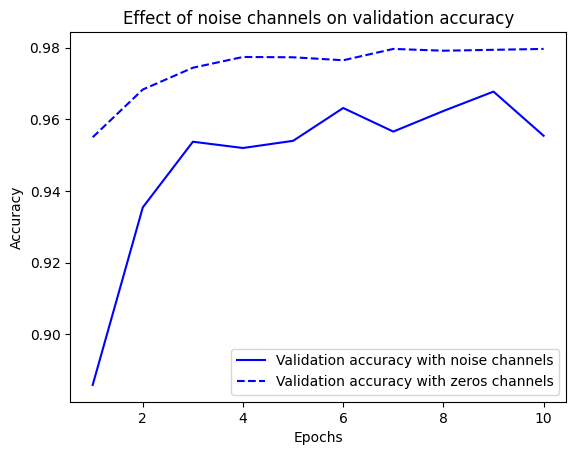

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<ipython-input-5-bb9af9808ae8>:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  lossdf = pd.concat([noisedf[['loss', 'val_loss']], zerodf[['loss', 'val_loss']]], 1)


<Axes: >

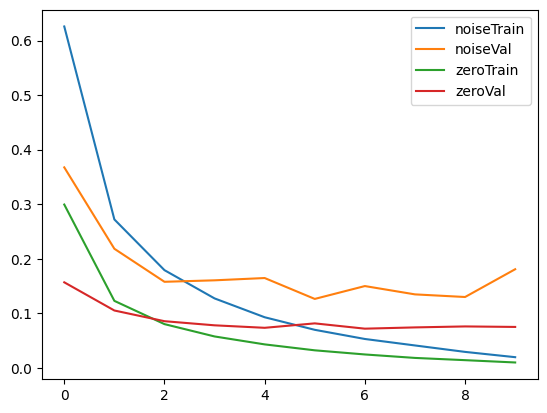

In [ ]:
import pandas as pd
noisedf = pd.DataFrame(history_noise.history)
zerodf = pd.DataFrame(history_zeros.history)
lossdf = pd.concat([noisedf[['loss', 'val_loss']], zerodf[['loss', 'val_loss']]], 1)
lossdf.columns = ['noiseTrain', 'noiseVal', 'zeroTrain', 'zeroVal']
lossdf.plot()

[Quiz] 왜 이러한 결과가 나왔을까?

### 딥러닝에서 일반화의 본질

**랜덤하게 섞은 레이블로 MNIST 모델 훈련하기**

In [ ]:
# (train_images, train_labels), _ = mnist.load_data()
# train_images = train_images.reshape((60000, 28 * 28))
# train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
h = model.fit(train_images, random_train_labels,
          epochs=20,
          batch_size=128,
          validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 2.3159 - accuracy: 0.1028 - val_loss: 2.3057 - val_accuracy: 0.1047
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2996 - accuracy: 0.1154 - val_loss: 2.3103 - val_accuracy: 0.1083
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2907 - accuracy: 0.1273 - val_loss: 2.3169 - val_accuracy: 0.1051
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 2.2797 - accuracy: 0.1390 - val_loss: 2.3256 - val_accuracy: 0.1028
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2638 - accuracy: 0.1534 - val_loss: 2.3415 - val_accuracy: 0.1062
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2444 - accuracy: 0.1669 - val_loss: 2.3461 - val_accuracy: 0.1021
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2217 - accuracy: 0.1788 - val_loss: 2.3579 - val_accuracy: 0.0967
Epoch 

<Axes: >

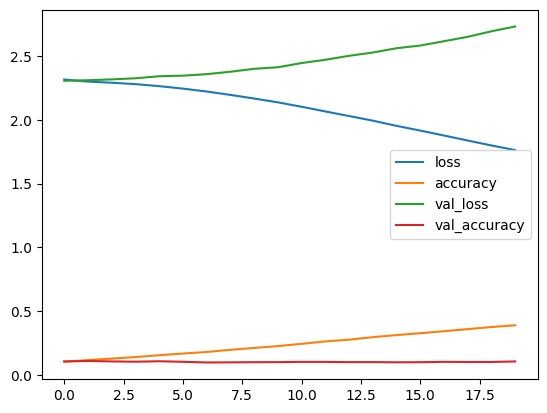

In [ ]:
import pandas as pd
df = pd.DataFrame(h.history)
df.plot()

[Quiz] 위와 같은 결과가 나온 이유는 무엇일까?

#### 매니폴드 가설

#### 일반화의 원천인 보간

#### 딥러닝이 작동하는 이유

#### 가장 중요한 훈련 데이터

## 머신 러닝 모델 평가

### 훈련, 검증, 테스트 세트

#### 단순 홀드아웃 검증

#### K-겹 교차 검증

#### 셔플링을 사용한 반복 K-겹 교차 검증

### 상식 수준의 기준점을 넘기

### 모델 평가에 대해 유념해야 할 점

## 훈련 성능 향상하기

### 경사 하강법의 핵심 파라미터 튜닝하기

**잘못된 높은 학습률로 MNIST 모델 훈련하기**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 766.8973 - accuracy: 0.3022 - val_loss: 2.4305 - val_accuracy: 0.1927
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 2.6073 - accuracy: 0.1849 - val_loss: 2.3417 - val_accuracy: 0.1688
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 2.8270 - accuracy: 0.1822 - val_loss: 2.4889 - val_accuracy: 0.1207
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5379 - accuracy: 0.1644 - val_loss: 2.2687 - val_accuracy: 0.1638
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5546 - accuracy: 0.1754 - val_loss: 2.1173 - val_accuracy: 0.1990
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3796 - accuracy: 0.1742 - val_loss: 2.2177 - val_accuracy: 0.2039
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6158 - accuracy: 0.1608 - val_loss: 2.2016 - val_accuracy: 0.1842
Epoc

**같은 모델을 적절한 학습률로 훈련하기**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3294 - accuracy: 0.9153 - val_loss: 0.1517 - val_accuracy: 0.9566
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1240 - accuracy: 0.9650 - val_loss: 0.1332 - val_accuracy: 0.9668
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0954 - accuracy: 0.9730 - val_loss: 0.1371 - val_accuracy: 0.9678
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0769 - accuracy: 0.9789 - val_loss: 0.1424 - val_accuracy: 0.9717
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0687 - accuracy: 0.9824 - val_loss: 0.1817 - val_accuracy: 0.9677
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0597 - accuracy: 0.9855 - val_loss: 0.1798 - val_accuracy: 0.9697
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0519 - accuracy: 0.9870 - val_loss: 0.2410 - val_accuracy: 0.9675
Epoch 

### 구조에 대해 더 나은 가정하기

### 모델 용량 조절하기

**MNIST 데이터를 사용한 간단한 로지스틱 회귀 모델**
- $y \in \{0, ..., 9\}$ : y를 one hot encoding 하면, loss에 categorical_crossentropy를 사용
- y를 one hot encoding 하지 않으면, sparse_categorical_crossentropy를 사용

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6691 - accuracy: 0.8347 - val_loss: 0.3590 - val_accuracy: 0.9060
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3537 - accuracy: 0.9027 - val_loss: 0.3093 - val_accuracy: 0.9149
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3179 - accuracy: 0.9120 - val_loss: 0.2937 - val_accuracy: 0.9181
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3019 - accuracy: 0.9159 - val_loss: 0.2848 - val_accuracy: 0.9206
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2920 - accuracy: 0.9188 - val_loss: 0.2777 - val_accuracy: 0.9233
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2854 - accuracy: 0.9207 - val_loss: 0.2751 - val_accuracy: 0.9247
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2807 - accuracy: 0.9215 - val_loss: 0.2723 - val_accuracy: 0.9247
Epoch 

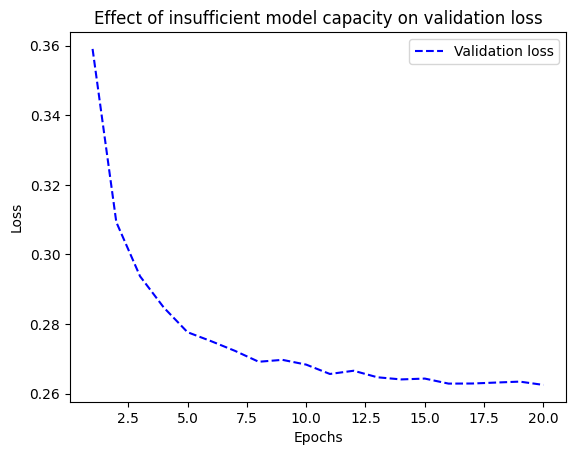

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 4ms/step - loss: 0.3547 - accuracy: 0.8985 - val_loss: 0.2008 - val_accuracy: 0.9414
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1578 - accuracy: 0.9528 - val_loss: 0.1363 - val_accuracy: 0.9599
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1103 - accuracy: 0.9667 - val_loss: 0.1155 - val_accuracy: 0.9647
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0845 - accuracy: 0.9745 - val_loss: 0.1041 - val_accuracy: 0.9685
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0683 - accuracy: 0.9797 - val_loss: 0.1075 - val_accuracy: 0.9690
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0568 - accuracy: 0.9833 - val_loss: 0.0962 - val_accuracy: 0.9725
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0465 - accuracy: 0.9856 - val_loss: 0.0890 - val_accuracy: 0.9745
Epoch 

## 일반화 성능 향상하기

### 데이터셋 큐레이션

### 특성 공학

### 조기 종료 사용하기
m.fit(X_train, y_train, batch_size, epoch, collbacks=[Early_stop()])

### 모델 규제하기
- 학습률 조정. learning rate
- 학습 시간 조정. epoch
- 학습을 방해하는 Regularization. L2 / L1 손실을 도입
- 학습을 무시하는 방법. Drop out / Drop connect

#### 네트워크 크기 축소

**원본 모델**

In [ ]:
from tensorflow.keras.datasets import imdb

# _의 의미는 test 데이터는 않쓰겠다는 의미
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

# 단어의 출현여부만을 담는 함수
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.5604 - accuracy: 0.7612 - val_loss: 0.4482 - val_accuracy: 0.8355
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3653 - accuracy: 0.8862 - val_loss: 0.3372 - val_accuracy: 0.8819
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2687 - accuracy: 0.9129 - val_loss: 0.2912 - val_accuracy: 0.8915
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2141 - accuracy: 0.9286 - val_loss: 0.2966 - val_accuracy: 0.8804
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1766 - accuracy: 0.9420 - val_loss: 0.2736 - val_accuracy: 0.8910
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1543 - accuracy: 0.9499 - val_loss: 0.2792 - val_accuracy: 0.8906
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1327 - accurac

**작은 용량의 모델**

In [ ]:
train_data.sum(axis=1)

array([120., 121.,  97., ..., 116.,  99.,  95.])

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.6163 - accuracy: 0.7419 - val_loss: 0.5386 - val_accuracy: 0.8304
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4768 - accuracy: 0.8687 - val_loss: 0.4415 - val_accuracy: 0.8620
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3825 - accuracy: 0.8937 - val_loss: 0.3777 - val_accuracy: 0.8750
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3183 - accuracy: 0.9093 - val_loss: 0.3366 - val_accuracy: 0.8812
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2707 - accuracy: 0.9190 - val_loss: 0.3083 - val_accuracy: 0.8855
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2358 - accuracy: 0.9275 - val_loss: 0.2986 - val_accuracy: 0.8842
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2093 - accuracy: 0.9352 - val_loss: 0.2986 - val_accuracy: 0.8802
Epoch 8/20
30

**큰 용량의 모델**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.5715 - accuracy: 0.7216 - val_loss: 0.3411 - val_accuracy: 0.8685
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3210 - accuracy: 0.8708 - val_loss: 0.3390 - val_accuracy: 0.8561
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2373 - accuracy: 0.9038 - val_loss: 0.3273 - val_accuracy: 0.8672
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1857 - accuracy: 0.9261 - val_loss: 0.2706 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1466 - accuracy: 0.9453 - val_loss: 0.3089 - val_accuracy: 0.8798
Epoch 6/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1068 - accuracy: 0.9649 - val_loss: 0.3254 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0840 - accuracy: 0.9747 - val_loss: 0.3544 - val_accuracy: 0.8829
Epoch 8/20
30

<ipython-input-16-5dda88c46310>:5: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  losses = pd.concat([o[['loss', 'val_loss']], s[['loss', 'val_loss']], l[['loss', 'val_loss']]], 1)
<ipython-input-16-5dda88c46310>:7: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  acces = pd.concat([o[['accuracy', 'val_accuracy']], s[['accuracy', 'val_accuracy']], l[['accuracy', 'val_accuracy']]], 1)


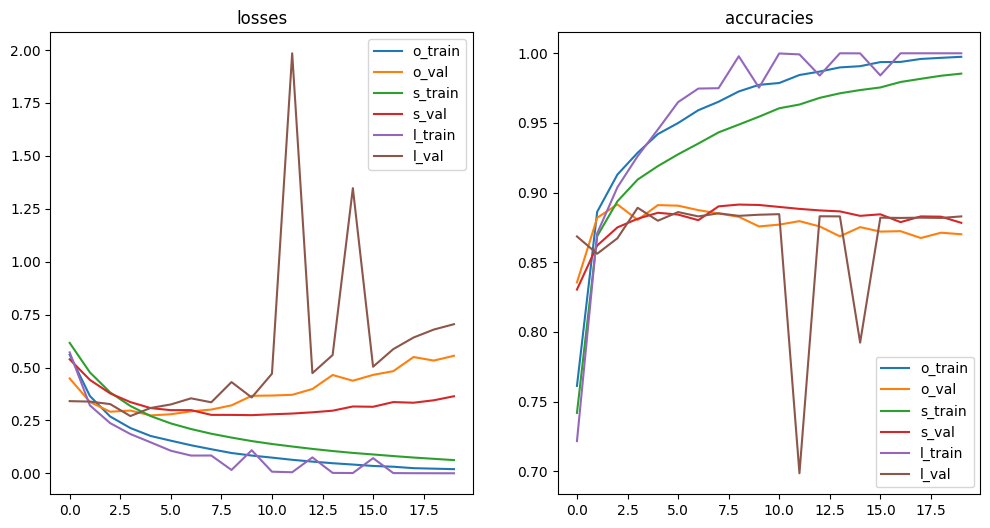

In [ ]:
import pandas as pd
o = pd.DataFrame(history_original.history)
s = pd.DataFrame(history_smaller_model.history)
l = pd.DataFrame(history_larger_model.history)
losses = pd.concat([o[['loss', 'val_loss']], s[['loss', 'val_loss']], l[['loss', 'val_loss']]], 1)
losses.columns = ['o_train', 'o_val', 's_train', 's_val', 'l_train', 'l_val']
acces = pd.concat([o[['accuracy', 'val_accuracy']], s[['accuracy', 'val_accuracy']], l[['accuracy', 'val_accuracy']]], 1)
acces.columns = ['o_train', 'o_val', 's_train', 's_val', 'l_train', 'l_val']

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(12, 6))
_ = losses.plot(ax=axes[0])
_ = axes[0].set_title('losses')
_ = acces.plot(ax=axes[1])
_ = axes[1].set_title('accuracies')

#### 가중치 규제 추가하기

In [ ]:
import gc
del model, train_images, train_images_with_noise_channels, train_images_with_zeros_channels
gc.collect()

3325

**모델에 L2 규제 추가하기**

TotalLoss = OriginalLoss + $\cfrac 1 2 \alpha ||w||^2$
- 아래 l2(0.002)에서 0.002는 규제계수 $\alpha$의 값이다.
- 일반적으로
 - L2 규제를 적용하는 것이 정확도가 높고
 - L1 규제를 적용하는 것이 중요한 변수를 식별하는 데 유리하고 (실행에 유리)
 - L1_L2 규제는 튜닝이 어렵고(시간이 많이 걸리고) L2보다 더 정확하지도 않고, L1보다 더 중요한 변수를 식별하지도 않아서, 잘 안쓴다.

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.6334 - accuracy: 0.7744 - val_loss: 0.5290 - val_accuracy: 0.8098
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4312 - accuracy: 0.8877 - val_loss: 0.4186 - val_accuracy: 0.8724
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3490 - accuracy: 0.9083 - val_loss: 0.4253 - val_accuracy: 0.8516
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3087 - accuracy: 0.9222 - val_loss: 0.3601 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2837 - accuracy: 0.9322 - val_loss: 0.3615 - val_accuracy: 0.8856
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2665 - accuracy: 0.9376 - val_loss: 0.4327 - val_accuracy: 0.8537
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2580 - accuracy: 0.9393 - val_loss: 0.3638 - val_accuracy: 0.8851
Epoch 8/20
30

In [ ]:
losses.columns

Index(['o_train', 'o_val', 's_train', 's_val', 'l_train', 'l_val'], dtype='object')

<ipython-input-23-20f885350154>:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  losses = pd.concat([losses, l2[['loss', 'val_loss']]], 1)
<ipython-input-23-20f885350154>:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  acces = pd.concat([acces, l2[['accuracy', 'val_accuracy']]], 1)


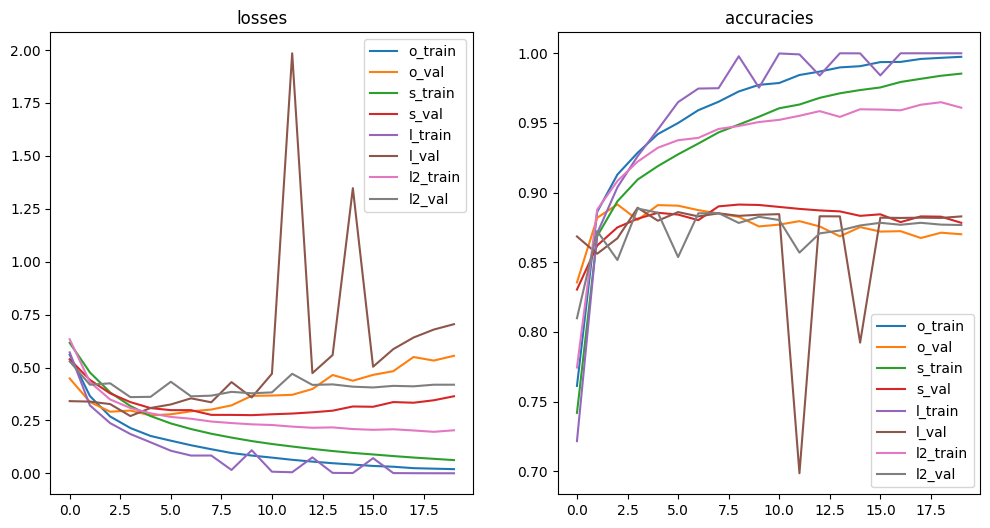

In [ ]:
l2 = pd.DataFrame(history_l2_reg.history)
losses = pd.concat([losses, l2[['loss', 'val_loss']]], 1)
losses.columns = list(losses.columns)[:-2] + ['l2_train', 'l2_val']
acces = pd.concat([acces, l2[['accuracy', 'val_accuracy']]], 1)
acces.columns = losses.columns

fig, axes = plt.subplots(1,2, figsize=(12, 6))
_ = losses.plot(ax=axes[0])
_ = axes[0].set_title('losses')
_ = acces.plot(ax=axes[1])
_ = axes[1].set_title('accuracies')

**케라스에서 사용할 수 있는 가중치 규제**

L1_L2 TotalLoss = OriginalLoss + $\alpha ||w|| + \cfrac 1 2 \beta ||w||^2$

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### 드롭아웃 추가

**IMDB 모델에 드롭아웃 추가하기**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 0.6471 - accuracy: 0.6188 - val_loss: 0.5734 - val_accuracy: 0.7863
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5430 - accuracy: 0.7730 - val_loss: 0.4785 - val_accuracy: 0.8478
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4728 - accuracy: 0.8325 - val_loss: 0.4325 - val_accuracy: 0.8723
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4163 - accuracy: 0.8693 - val_loss: 0.3943 - val_accuracy: 0.8791
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3706 - accuracy: 0.8916 - val_loss: 0.3617 - val_accuracy: 0.8797
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3319 - accuracy: 0.9065 - val_loss: 0.3520 - val_accuracy: 0.8827
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2981 - accuracy: 0.9173 - val_loss: 0.3302 - val_accuracy: 0.8786
Epoch 8/20
30

## 요약
1. 언더핏이 발생하지 않도록
 - 데이터를 더 모으고
 - 데이터 정제를 더 잘 하고
 - 데이터에 맞는 알고리즘을 사용하고
 - 충분한 출력 노드와 깊이를 가져야 한다.
2. 오버핏이 발생하지 않도록
 - 데이터를 잘 자르고
 - 적당한 출력 노드와 깊이를 가지고
 - 초기 중단 콜백함수를 사용하여 과한 epoch를 지양하며
 - L1, L2, dropout 등을 적용한다.

## [부록] 데이터 가중치 설정
여기서는 데이터에 있는 3가지의 가중치를 설정하는 방법을 알아본다.
1. 분류 문제에 있어, 중요하지만 드믄 범주에 가중치를 부여하기
2. 일반적인 예측 문제에 있어, 중요하지만 드믄 샘플에 가중치를 부여하기
3. 여러 타겟이 있을 때, 특정 타겟의 정확도가 더 중요할 경우, loss에 가중치 부여

#### class weight 설정
특정 class를 더 잘 맞추어야 한다든지, 희귀한 class에 대한 정확도를 높이고자 하는 경우에 사용할 수 있다.

아래와 같이 모델의 fit 메소드에 설정해주면 된다:
```python
Model.fit(class_weight=c5w2)
```

In [ ]:
c5w2 = {
    0: 1.0,
    1: 1.0,
    2: 1.0,
    3: 1.0,
    4: 1.0,
    # Set weight "2" for class "5",
    # making this class 2x more important
    5: 2.0,
    6: 1.0,
    7: 1.0,
    8: 1.0,
    9: 1.0,
}

[Quiz] 위와같이 5의 가중치를 2배로 설정할 때, test로 평가시 각 digit별 정확도를 측정하여 평가해보세요.

#### 샘플 가중치
특정 데이터 샘플들이 중요한 데이터라서 이에 대한 가중치를 부여하고자 하는 경우 사용
1. numpy input : fit(..., sample_weight=sw)
```python
sample_weight = np.ones(shape=(len(y_train),))
sample_weight[y_train == 5] = 2.0
print("Fit with sample weight")
model = get_compiled_model()
model.fit(x_train, y_train, sample_weight=sample_weight, batch_size=64, epochs=1)
```
2. tf.data, generator : yield (X_batch, y_batch, sample_weight_batch) 생성
```python
sample_weight = np.ones(shape=(len(y_train),))
sample_weight[y_train == 5] = 2.0
# Create a Dataset that includes sample weights
# (3rd element in the return tuple).
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train, sample_weight))
# Shuffle and slice the dataset.
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)
model = get_compiled_model()
model.fit(train_dataset, epochs=1)
```

#### 다중 출력 loss 가중치
다중 출력을 하는 경우, 어떤 출력의 loss를 더 경감시켜야 하는 지 모델에게 알려줍니다.

model.compile 옵션에서 loss_weights 옵션을 사용합니다.
```python
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={
        "score_output": keras.losses.MeanSquaredError(),
        "class_output": keras.losses.CategoricalCrossentropy(),
    },
    metrics={
        "score_output": [
            keras.metrics.MeanAbsolutePercentageError(),
            keras.metrics.MeanAbsoluteError(),
        ],
        "class_output": [keras.metrics.CategoricalAccuracy()],
    },
    loss_weights={"score_output": 2.0, "class_output": 1.0},
)
```

## [부록] Normalization

참고
- https://kwonkai.tistory.com/144

## [부록] Stochastic Depth Network
dropout을 확장하여 :residual block이 있을 때 residual layer를 stochastic하게 drop하자. 더불어 학습시간도 단축되고, 테스트 성능도 올라간다. 이후, Swin Transformer 등 꾸준히 여러 모델에서 사용되고 있다.

residual block의 drop rate는 uniform 보다는 아래 그림처럼 linear decay가 좋다고 함.
![](https://velog.velcdn.com/images%2Fiissaacc%2Fpost%2Feaabdb3b-1d31-4a5c-baa0-db5c49cfce32%2Fimage.png)
- 최종 drop rate가 0.5 일 때가 가장 좋았다고 하지만,
- data의 종류나 망의 깊이에 따라 case by case라고 함.
- 학습을 지연시키는 효과가 있으므로 epoch을 충분히 늘리고, 튜닝도 필요함

참고자료
- [Review: Stochastic Depth (Image Classification)](https://towardsdatascience.com/review-stochastic-depth-image-classification-a4e225807f4a)
- [케라스 구현 소스코드](https://github.com/transcranial/stochastic-depth)
- [tfa.layers.StochasticDepth](https://www.tensorflow.org/addons/api_docs/python/tfa/layers/StochasticDepth)